In [44]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

%load_ext google.colab.data_table
%precision 2


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


'%.2f'

In [47]:
# Creating the dataframe

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/Data/co2_emissions.csv"
df = pd.read_csv(path)

#setting up the dataframe
df.drop([0,1,2,67], axis=0, inplace=True )
df = df.reset_index(drop=True)
df.columns = ['country', '1990', '2005', '2017', '2021']
df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,1990,2005,2017,2021
0,Afghanistan,2.546,1.063,11.422,8.35
1,Albania,6.583,4.196,5.026,4.59
2,Algeria,65.677,98.197,159.929,173.00
3,Angola,5.851,15.975,30.876,24.45
4,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
203,Vietnam,20.182,99.231,218.729,321.41
204,Western Sahara,0.144,0.227,0.276,0.24
205,Yemen,6.887,21.768,12.503,12.05
206,Zambia,2.955,2.457,4.967,7.01


### **Graph 1: CO2 of the bigger countries**

Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement).

In [48]:
# create the necessary masks + dataframe

biggest_5_co2_producers = df.nlargest(5, '2021', keep='all')

years = biggest_5_co2_producers.columns[1:]
biggest_5_co2_producers

,country,1990,2005,2017,2021
39,China,2397.050,6263.06,10877.22,12466.32
198,United States,5085.900,5971.57,5107.39,4752.08
89,India,605.968,1210.75,2454.77,2648.78
154,Russia,2378.920,1733.95,1764.87,1942.54
98,Japan,1149.400,1276.86,1320.78,1084.69


<Figure size 640x480 with 0 Axes>

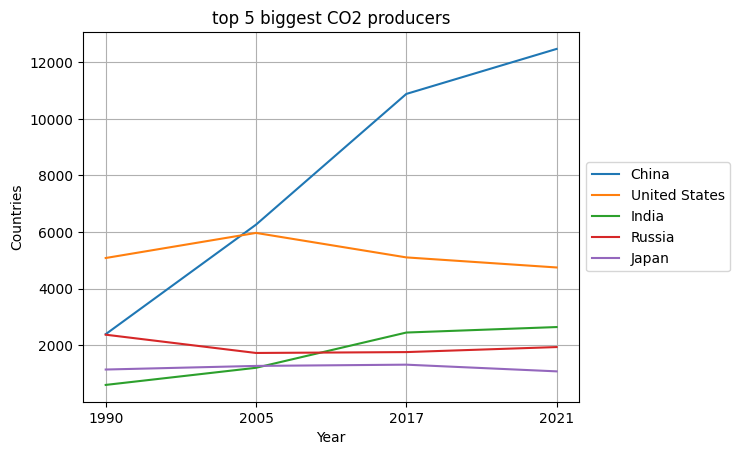

In [6]:
# plotting the figure

fig = plt.figure()
fig, ax = plt.subplots()

# interate over every row to get all the data
for index, row in biggest_5_co2_producers.iterrows():
  plt.plot(years, row[1:], label=row[0])

# settings of the figure
plt.title("top 5 biggest CO2 producers")
plt.xlabel("Year")
plt.ylabel("Countries")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

### **Graph 2: worst and best changers**

calculate the relative change and sort by that change.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

In [17]:
#adding new column to calculate relative change

df['rc1990'] = (df.loc[:,'1990'] / df.loc[:,'1990']) * 100
df['rc2005'] = (df.loc[:,'2005'] / df.loc[:,'1990']) * 100
df['rc2017'] = (df.loc[:,'2017'] / df.loc[:,'1990']) * 100
df['rc2021'] = (df.loc[:,'2021'] / df.loc[:,'1990']) * 100  #setting 1990 as 100%

# sorting the dataframe by value from relative change in 2021 (biggest on top)
df = df.sort_values(by=['rc2021'], ascending=False)
df = df[['country', '1990', '2005', '2017', '2021', 'rc1990', 'rc2005', 'rc2017', 'rc2021']]  #re-order the dataframe because 1990 was added last.

# making a df with only the top 3 and bottom 3 countries.
changers = df.iloc[[0,1,2,205,206,207]]
changers


,country,1990,2005,2017,2021,rc1990,rc2005,rc2017,rc2021
77,Greenland,0.003,0.631,0.518,0.46,100.0,21033.333333,17266.666667,15333.333333
105,Laos,0.211,1.038,2.818,20.56,100.0,491.943128,1335.545024,9744.075829
59,Equatorial Guinea,0.097,3.371,2.469,7.00,100.0,3475.257732,2545.360825,7216.494845
7,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
124,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
195,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473


<Figure size 640x480 with 0 Axes>

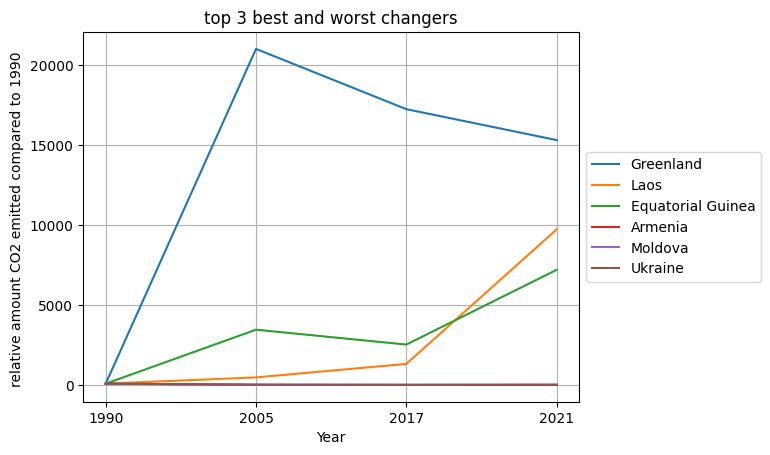

In [18]:
# plotting the figure

fig = plt.figure()
fig, ax = plt.subplots()

# interate over every row to get all the data
for index, row in changers.iterrows():
  plt.plot(years, row[5:], label=row[0])

# settings of the figure
plt.title("top 3 best and worst changers")
plt.xlabel("Year")
plt.ylabel("relative amount CO2 emitted compared to 1990 ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()

**Create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.**

In [34]:
# make a mask to filter out the countries that have atleast 5 Mt of CO2 in 1990

at_least_5Mt_CO2_1990 = df.loc[df['1990'] >= 5]

#create a new dataframe for the top and bottom 3:
best_and_worst_3 = at_least_5Mt_CO2_1990.iloc[[0,1,2,101,102,103]]
best_and_worst_3


,country,1990,2005,2017,2021,rc1990,rc2005,rc2017,rc2021
203,Vietnam,20.182,99.231,218.729,321.41,100.0,491.680706,1083.782579,1592.557725
140,Oman,11.884,32.964,78.421,94.62,100.0,277.381353,659.887243,796.196567
14,Bangladesh,13.868,38.834,84.546,106.87,100.0,280.025959,609.648111,770.623017
7,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
124,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
195,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473


<Figure size 640x480 with 0 Axes>

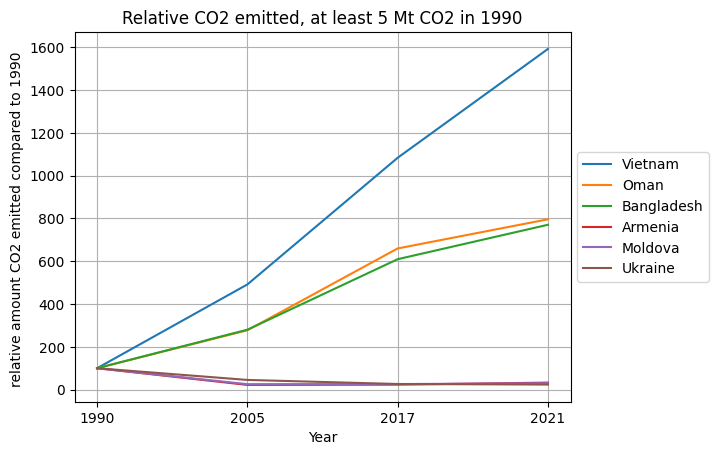

In [35]:
# plotting the figure

fig = plt.figure()
fig, ax = plt.subplots()

# interate over every row to get all the data
for index, row in best_and_worst_3.iterrows():
  plt.plot(years, row[5:], label=row[0])

# settings of the figure
plt.title("Relative CO2 emitted, at least 5 Mt CO2 in 1990")
plt.xlabel("Year")
plt.ylabel("relative amount CO2 emitted compared to 1990 ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.show()